# Loan Approval Prediction - Logistic Regression

#### The goal of the project is to develop a predictive model using logistic regression to determine whether a loan applicant is likely to be approved or not by a financial institution. This type of project falls within the realm of binary classification, where the outcome can take one of two possible classes: "approved" as '1' or "not approved" as '0'.

## Dataset 

####  Columns in Dataset are
#####  loan_id,    no_of_dependents,   education, self_employed,   income_annum,   loan_amount,   loan_term, cibil_score, residential_assets_value,   commercial_assets_value,   luxury_assets_value,   bank_asset_value, loan_status 

## Import Libraries

In [166]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read the data file 

In [88]:
data = pd.read_csv('loan_approval_cleaned_datase.csv')

In [89]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [91]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [92]:
data = data.drop('loan_id',axis=1) 

In [93]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [94]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [95]:
data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [96]:
data['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
data['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

### Encoding the columns 'education', 'self_employed' and 'loan_status' into 0's ans 1's 

In [98]:
# for education column 

In [99]:
education = {'Graduate':1,'Not Graduate':0}

In [100]:
data['education'] = data['education'].apply(lambda x : education[x])

In [101]:
# for self_employed column

In [102]:
employed = {'Yes':1, 'No':0}
data['self_employed'] = data['self_employed'].apply(lambda x : employed[x])

In [103]:
# for loan_status column 

In [104]:
loan = {'Approved' : 1, 'Rejected' : 0}
data['loan_status'] = data['loan_status'].apply(lambda x : loan[x])

In [105]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [106]:
# check the outliers

<AxesSubplot:>

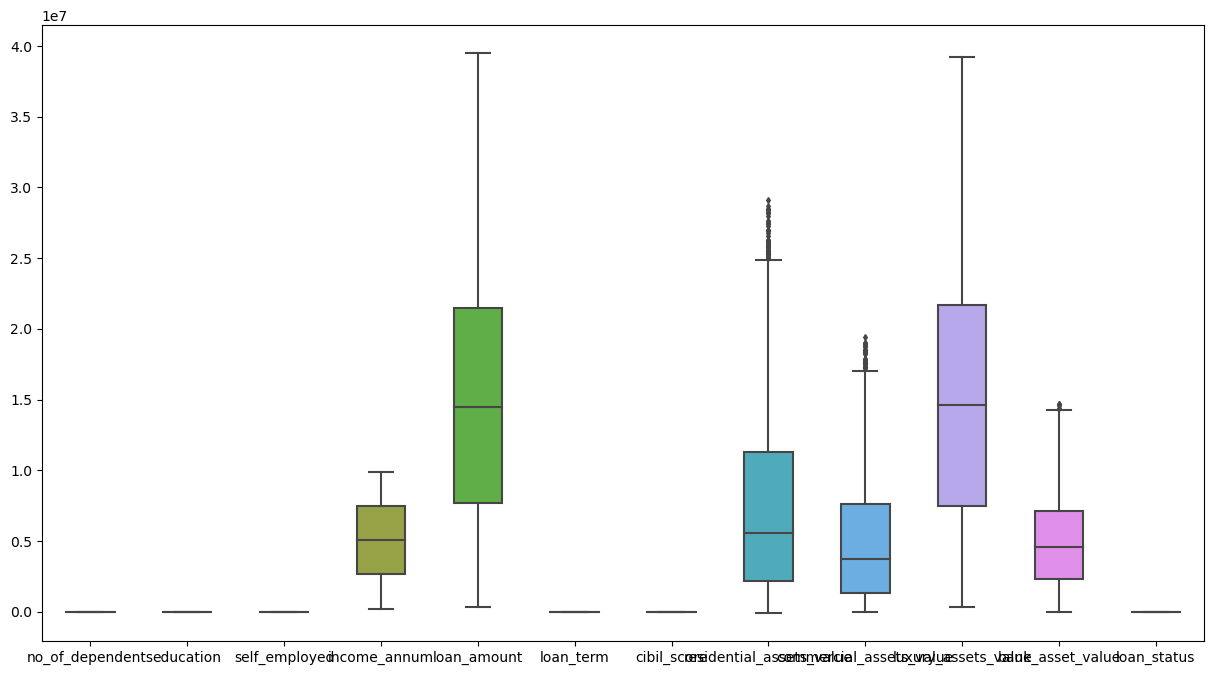

In [107]:
fig ,ax = plt.subplots(figsize = (15,8))
sns.boxplot(data = data, width = 0.5,ax = ax , fliersize=3)

## Selecting the Independent and Dependent feature

In [108]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

In [109]:
X.shape,y.shape

((4269, 11), (4269,))

## Train ans test data set

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
X_train.shape,X_test.shape

((3201, 11), (1068, 11))

In [112]:
y_train.shape,y_test.shape

((3201,), (1068,))

## Feature Selection

<AxesSubplot:>

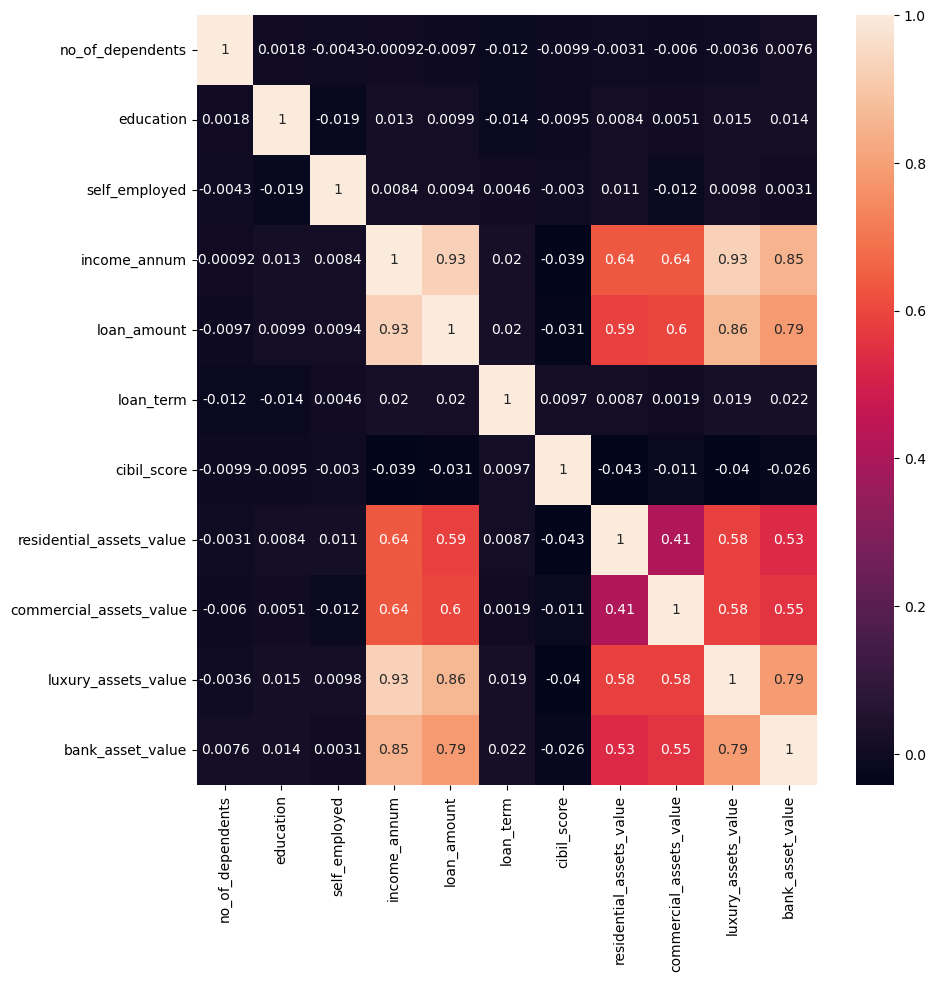

In [113]:
plt.figure(figsize=(10,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

### Standared Scaling

In [114]:
import pickle

In [115]:
# standard scaling_Standardization 

In [116]:
def scaler_standard(X_train,X_test):
    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # save the model
    file = open("standardscaler.pkl",'wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [117]:
X_train_scaled,X_test_scaled = scaler_standard(X_train,X_test)

In [118]:
X_test_scaled

array([[ 1.52065862,  0.99968765, -1.01099452, ...,  1.1545764 ,
         0.05284591,  0.71813745],
       [-0.25519992,  0.99968765, -1.01099452, ...,  1.04033929,
         0.28102902,  0.53371551],
       [ 0.33675293,  0.99968765, -1.01099452, ...,  2.5711166 ,
         1.44367633,  0.50297852],
       ...,
       [-0.25519992,  0.99968765,  0.98912505, ...,  0.40061146,
         0.19410212, -0.14249826],
       [ 1.52065862, -1.00031245,  0.98912505, ..., -0.99308131,
        -0.33832515, -0.44986815],
       [ 1.52065862, -1.00031245, -1.01099452, ..., -0.42189575,
        -0.93594759, -0.72650106]])

##  Box PLots To Understande Effect Of Standard Scale

Text(0.5, 1.0, 'X_train After Scaling')

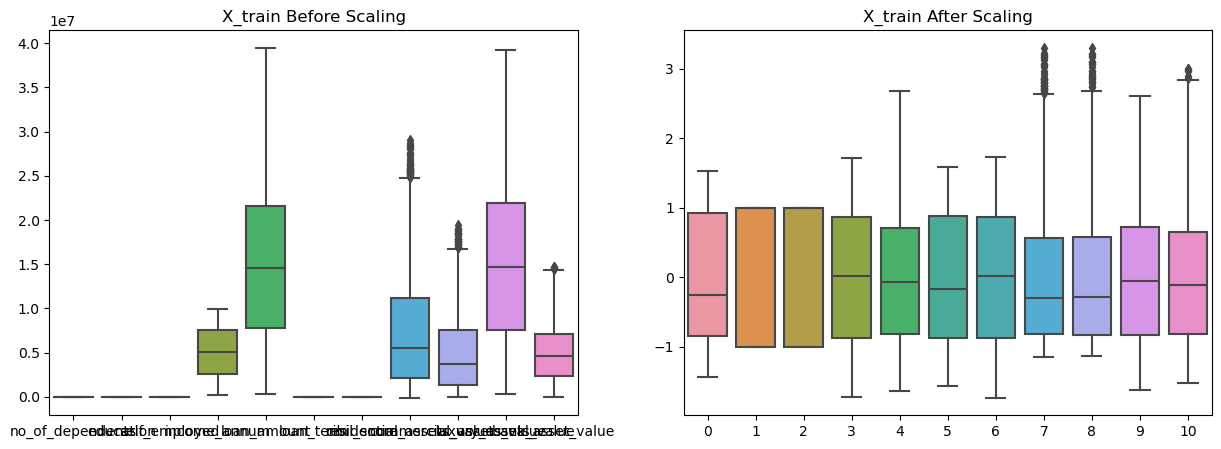

In [120]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaled)
plt.title('X_train After Scaling')

# Logistic Regression Model

In [121]:
log_reg = LogisticRegression()

In [124]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [169]:
y_pred1 = log_reg.predict(X_test_scaled)

In [170]:
y_pred1

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [185]:
def evaluation_parametrics(name,y_test, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nAccuracy Score of the model for Data Test\n")
    print(accuracy_score(y_test,y_pred))
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_test, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()

### Confusion Matrix , Accuracy Score, Classification report


------------------------Machine Learning - Classification------------------------


Accuracy Score of the model for Data Test

0.9054307116104869

Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       390
           1       0.92      0.93      0.93       678

    accuracy                           0.91      1068
   macro avg       0.90      0.90      0.90      1068
weighted avg       0.91      0.91      0.91      1068

--------------------------------------------------------------------------


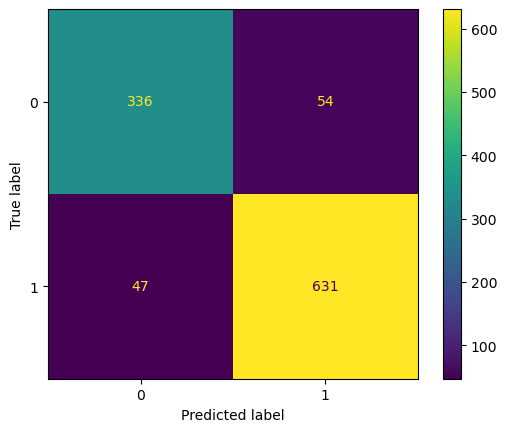

In [186]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred1)

# Hyperparameter Tuning

### GridSearchCV

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
panameters = {'penalty' : ('l1','l2','elasticnet',None),'C':
             [1,10,20,15]}

In [189]:
clf = GridSearchCV(log_reg,param_grid=panameters,cv=5)

In [190]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 15],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [191]:
clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [192]:
y_pred2 = clf.predict(X_test_scaled)

In [193]:
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)


------------------------Machine Learning - Classification------------------------


Accuracy Score of the model for Data Test

0.903558052434457

Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       390
           1       0.92      0.93      0.92       678

    accuracy                           0.90      1068
   macro avg       0.90      0.89      0.90      1068
weighted avg       0.90      0.90      0.90      1068

--------------------------------------------------------------------------


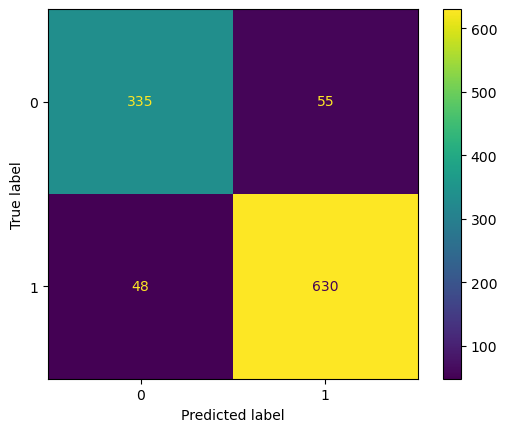

In [194]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred2)

## Reandomized SearchCV

In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
random_clf = RandomizedSearchCV(log_reg,param_distributions=panameters,cv=5)

In [197]:
random_clf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20, 15],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [198]:
random_clf.best_params_

{'penalty': 'l2', 'C': 10}

In [199]:
y_pred3 = random_clf.predict(X_test_scaled)

In [200]:
y_pred3

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)


------------------------Machine Learning - Classification------------------------


Accuracy Score of the model for Data Test

0.903558052434457

Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       390
           1       0.92      0.93      0.92       678

    accuracy                           0.90      1068
   macro avg       0.90      0.89      0.90      1068
weighted avg       0.90      0.90      0.90      1068

--------------------------------------------------------------------------


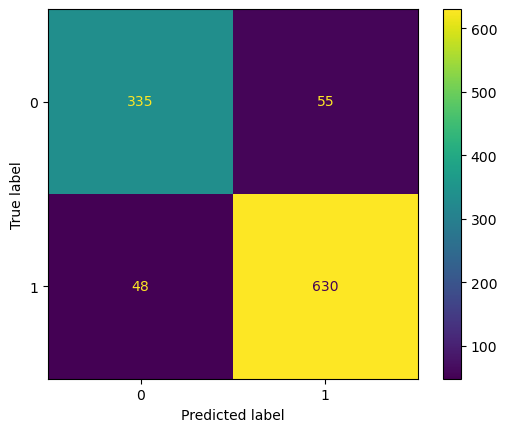

In [201]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred3)

## Logistic Regression Model have greater Accuracy Score 

### With the Accuracy Score 0.9054307116104869

In [202]:
file = open('modelForPredictionLoan.pkl','wb')
pickle.dump(log_reg,file)
file.close()